### Tuning Observation

#### Load Dataset

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Load Dataset
path = './source/l1.csv'
data = pd.read_csv(path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Time,ARIMA,SARIMA,ETS,RNN,LSTM,CNN,GRU,TCN,Actual,Raw
0,2023-09-08 02:39:20,0.540644,0.541378,0.541510,0.541061,0.545402,0.541755,0.540557,0.542601,0.540948,0.511
1,2023-09-08 02:39:25,0.532119,0.535309,0.531985,0.536035,0.542385,0.537362,0.534266,0.540143,0.535663,0.538
2,2023-09-08 02:39:30,0.525069,0.532046,0.522435,0.535751,0.542976,0.537996,0.536223,0.540704,0.535930,0.534
3,2023-09-08 02:39:35,0.519240,0.529275,0.513022,0.540611,0.541195,0.541960,0.538225,0.543890,0.537138,0.541
4,2023-09-08 02:39:40,0.514419,0.525706,0.503897,0.543885,0.542825,0.545963,0.543374,0.546692,0.534217,0.543


#### Find Pearson Correlation

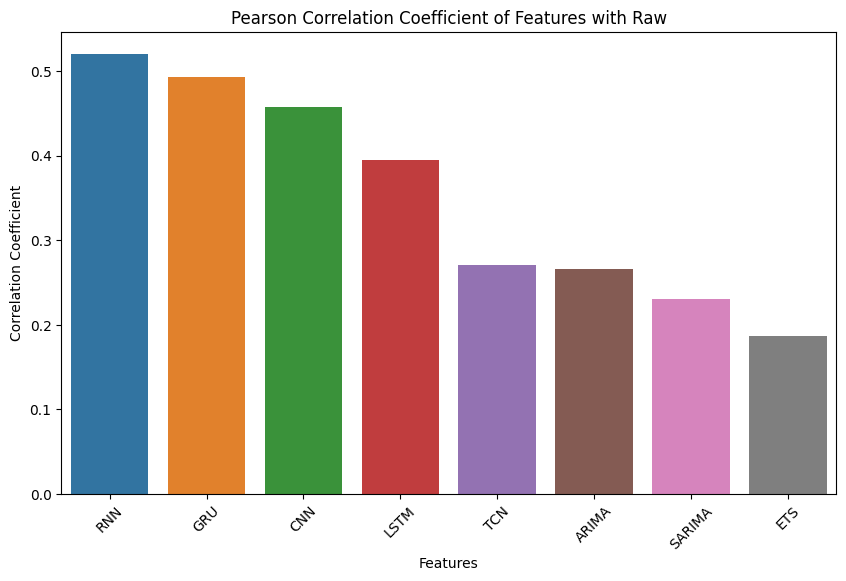

,Correlation with Raw
RNN,0.520115
GRU,0.492259
CNN,0.456891
LSTM,0.394310
TCN,0.270776
ARIMA,0.266182
SARIMA,0.230876
ETS,0.186574


In [3]:
# Calculating Pearson correlation coefficient between each feature and the 'Actual' column
features = ['ARIMA', 'SARIMA', 'ETS', 'RNN', 'LSTM', 'CNN', 'GRU', 'TCN']
correlation_target = 'Raw'
prediction_target = 'Raw'
rmse_target = 'Raw'
correlations = {feature: pearsonr(data[feature], data[correlation_target])[0] for feature in features}

# Sorting the features based on their correlation in descending order
sorted_features = sorted(correlations, key=correlations.get, reverse=True)

# Displaying the correlation coefficients
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=[f'Correlation with {correlation_target}'])
correlation_df_sorted = correlation_df.reindex(sorted_features)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted[f'Correlation with {correlation_target}'])
plt.title(f'Pearson Correlation Coefficient of Features with {correlation_target}')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation_df_sorted

In [4]:
# Recalculating Pearson correlation coefficient between each feature and the 'Actual' column
numeric_columns = features + [prediction_target]
numeric_data = data[numeric_columns]
cleaned_data = numeric_data.dropna(subset=[prediction_target])
compare_rmse_column = data[rmse_target].dropna().iloc[750:]

# Preparing the training and testing datasets
train_data = cleaned_data.iloc[:750]
test_data = cleaned_data.iloc[750:]

#### Linear Regression

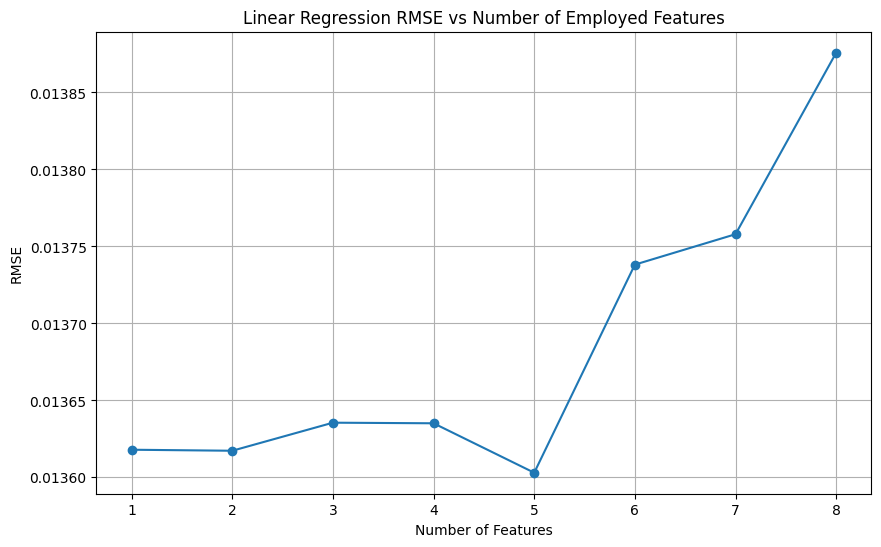

[0.013617959276937448,
 0.013617295812231155,
 0.013635522365559139,
 0.01363513712371982,
 0.013603024086853403,
 0.013738196381257716,
 0.013757942136223304,
 0.013875831874621092]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List to store RMSE values for each iteration
rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the model
    model = LinearRegression()
    model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the model
    predictions = model.predict(test_data[selected_features])
    rmse = mean_squared_error(compare_rmse_column, predictions, squared=False)
    rmse_values.append(rmse)

# Plotting the graph of RMSE vs number of employed features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rmse_values, marker='o')
plt.title('Linear Regression RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values
rmse_values

#### Random Forest

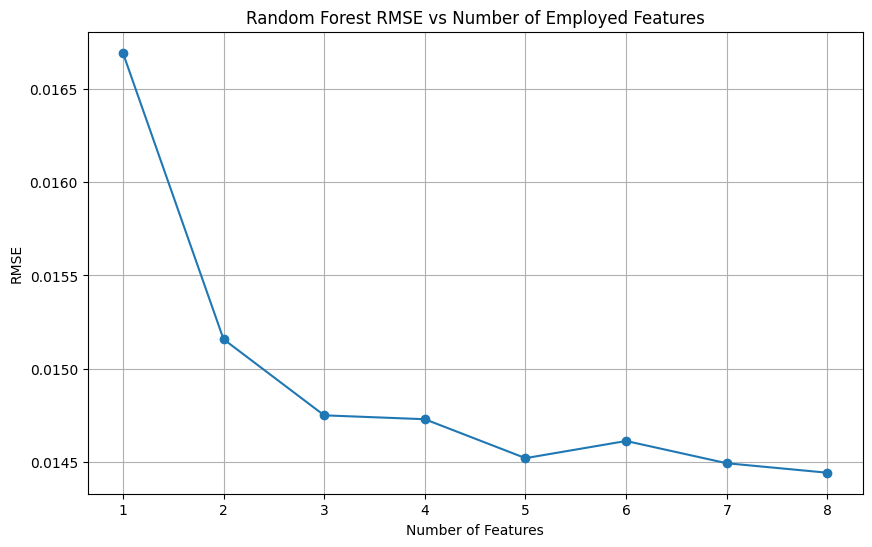

[0.0166947774362425,
 0.015158252412464969,
 0.014749975789810632,
 0.014729118554754039,
 0.014520314776202333,
 0.014612362163592834,
 0.014492962492189074,
 0.014442153454384824]

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Random Forest
rf_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the Random Forest model
    rf_predictions = rf_model.predict(test_data[selected_features])
    rf_rmse = mean_squared_error(compare_rmse_column, rf_predictions, squared=False)
    rf_rmse_values.append(rf_rmse)

# Plotting the graph of RMSE vs number of employed features for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rf_rmse_values, marker='o')
plt.title('Random Forest RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Random Forest
rf_rmse_values

#### Feed Forward Neural Network

16/16 [==============================] - 0s 2ms/step


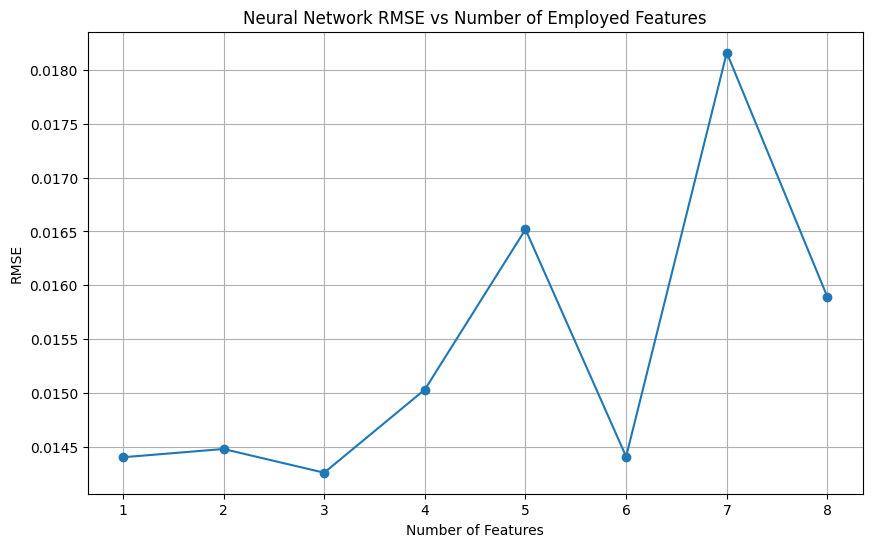

[0.014405270222014842,
 0.014481814970703279,
 0.014261804586366007,
 0.01503302658519578,
 0.01651884310429415,
 0.014411223040201981,
 0.01815749872373434,
 0.015891181118766376]

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Neural Network
nn_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[prediction_target].values
    y_test = test_data[prediction_target].values

    # Define the Neural Network model architecture
    model = Sequential([
        Dense(50, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(50, activation="relu"),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer=Adam(), loss="mse")

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Predict using the model
    nn_predictions = model.predict(X_test).flatten()

    # Calculate RMSE
    nn_rmse = mean_squared_error(compare_rmse_column, nn_predictions, squared=False)
    nn_rmse_values.append(nn_rmse)

# Plotting the graph of RMSE vs number of employed features for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), nn_rmse_values, marker='o')
plt.title('Neural Network RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Neural Network
nn_rmse_values